source: https://huggingface.co/docs/transformers/model_doc/vision-encoder-decoder

In [4]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel

In [2]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

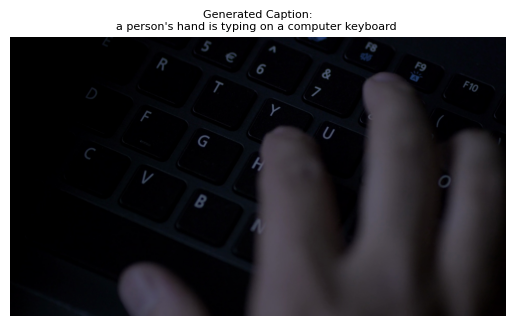

In [9]:
# let's perform inference on an image
path = "../../data/processed/image/tt4652838/tt4652838-Scene-456-02.jpg"
image = Image.open(path)
pixel_values = image_processor(image, return_tensors="pt").pixel_values

# autoregressively generate caption (uses greedy decoding by default)
generated_ids = model.generate(pixel_values)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
# Mostrar la imagen y el subtítulo generado
plt.imshow(image)
plt.axis("off")
plt.title(f"Generated Caption:\n{generated_text}", fontsize=8)
plt.show()

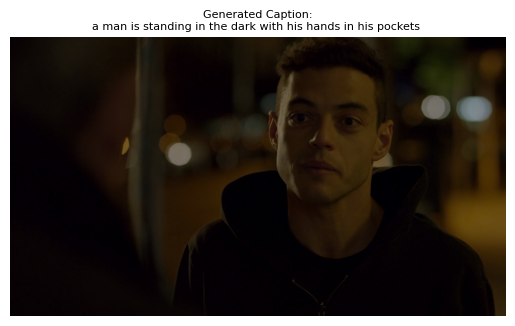

In [26]:
# let's perform inference on an image
path = "../../data/processed/image/tt4652838/tt4652838-Scene-765-02.jpg"
image = Image.open(path)
pixel_values = image_processor(image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
plt.imshow(image)
plt.axis("off")
plt.title(f"Generated Caption:\n{generated_text}", fontsize=8)
plt.show()